# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# Feature Engineering

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
X = df.drop(columns=['booking_complete'], axis=1)
y = df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [19]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X,y)
mi_scores = pd.Series(mi_scores, name = "MI scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.053788
booking_origin           0.046330
flight_duration          0.015916
wants_extra_baggage      0.010404
length_of_stay           0.009379
num_passengers           0.002828
wants_preferred_seat     0.002706
purchase_lead            0.001955
wants_in_flight_meals    0.001715
sales_channel            0.001232
flight_day               0.000323
trip_type                0.000085
flight_hour              0.000000
Name: MI scores, dtype: float64

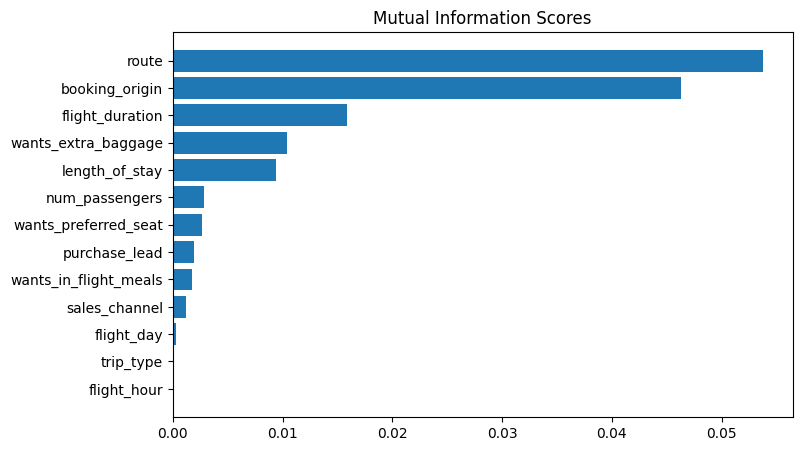

In [28]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

As we can see top 5 are most important features of the data:
1. route
2. booking_origin
3. flight_duration
4. wants_extra_baggage
5. length_of_stay

These features are sufficient to predict booking status of new user as booking_complete is mostly dependent on these

Spliting data into train, test and validation set

In [35]:
df[['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay']]

,route,booking_origin,flight_duration,wants_extra_baggage,length_of_stay
0,AKLDEL,New Zealand,5.52,1,19
1,AKLDEL,New Zealand,5.52,0,20
2,AKLDEL,India,5.52,1,22
3,AKLDEL,New Zealand,5.52,0,31
4,AKLDEL,India,5.52,1,22
...,...,...,...,...,...
49995,PERPNH,Australia,5.62,1,6
49996,PERPNH,Australia,5.62,0,6
49997,PERPNH,Australia,5.62,0,6
49998,PERPNH,Australia,5.62,1,6


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state)

# Model 1: Random forest classifier with top 6 features

In [55]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'num_passengers']
X = df[features]

# one-hot encoding
X = pd.get_dummies(X, columns=features)

# Min max scaling
scaler = MinMaxScaler()
scaler.fit(X)

y = df['booking_complete']

# spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

print('ACCURACY: ',accuracy_score(y_test,pred)*100)
print('AUC score: ',roc_auc_score(y_test,pred))

ACCURACY:  81.86
AUC score:  0.5008965668320731


# Model 2: Gradient boosting with top 6 features

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

gb = GradientBoostingClassifier()

gb_model = gb.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print('ACCURACY: ',accuracy_score(y_test,y_pred)*100)
print('AUC score: ',roc_auc_score(y_test,y_pred))

ACCURACY:  84.61999999999999
AUC score:  0.5076088187224322


# Model 3: Random forest classifier with all features

In [57]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['booking_complete'])

# one-hot encoding
X = pd.get_dummies(X)

# Min max scaling
scaler = MinMaxScaler()
scaler.fit(X)

y = df['booking_complete']

# spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
pred = forest_model.predict(X_test)

print('ACCURACY: ',accuracy_score(y_test,pred)*100)
print('AUC score: ',roc_auc_score(y_test,pred))

ACCURACY:  85.22999999999999
AUC score:  0.561470588235294


# Model 4: Gradient boosting with all features

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

gb = GradientBoostingClassifier()

gb_model = gb.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print('ACCURACY: ',accuracy_score(y_test,y_pred)*100)
print('AUC score: ',roc_auc_score(y_test,y_pred))

ACCURACY:  85.28999999999999
AUC score:  0.5162549019607844


On comparing ACCURACY of above models, Gradient boosting with all features is the best model.